# Description of the problem and solution

The problem was a classification task. We had 3 classes but these were unbalanced with one to have a significantly higher number of samples. To fix the unbalanced classes different techniques were used including upsampling of the classes with lower number of samples and downsampling of the class with higher number of samples. All of these techniques were outperformed though by using different weights for the penalty term. In this way we use all the power of the real dataset since we don't lose information like we did in the downsampling scenario either we introduce artificial information which might be wrong like we did in the upsampling scenario. Finally, using cross-validation we tested different models for the classification task. The best model proved to be through the cross-validation a Support Vector Machine model for the classification task. More precisely we used the SVC function from sklearn package. For the hyperparameters we used balanced classes weights and One -Versue -Rest strategy and C = 1.0 for the penalty term error. The model has 0.702 mean score in the cross-validation and 0.7185 in the public scoreboard.


# Include all the necessary packages

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC

# Load the data from the CSV files

In [0]:
column_names_x = ['id']
for i in range(1000):
  column_names_x.append('x'+str(i))

raw_dataset_x = pd.read_csv('/content/X_train.csv', names=column_names_x,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True, skiprows=True)

dataset_x = raw_dataset_x.copy()
dataset_x.tail()

column_names_x.remove('id')

In [12]:
column_names_y = ['id','y']
raw_dataset_y = pd.read_csv('/content/y_train.csv', names=column_names_y,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True, skiprows=True)

dataset_y = raw_dataset_y.copy()
dataset_y.tail()

,id,y
4795,4795,1
4796,4796,1
4797,4797,1
4798,4798,0
4799,4799,0


In [13]:
dataset_x.pop("id")
dataset_y.pop("id")

0          0
1          1
2          2
3          3
4          4
        ... 
4795    4795
4796    4796
4797    4797
4798    4798
4799    4799
Name: id, Length: 4800, dtype: int64

# One-Hot Encoding

In [14]:
def one_hot_encoding(label):
    if label == 0:
        one_hot = np.array([1,0,0])
    elif label == 1:
        one_hot = np.array([0,1,0])
    elif label == 2:
        one_hot = np.array([0,0,1])
    return one_hot

def column(matrix, i):
    return [row[i] for row in matrix]

dataset_y = np.asarray(dataset_y)
dataset_y = column(dataset_y, 0)

dataset_x = np.asarray(dataset_x)

list_x=[]
for i in range(4800):
    list_x.append(dataset_x[i,:])

dataset_x = np.asarray(list_x)

print (len(dataset_x))
print (len(dataset_y))

4800
4800


# Cross - Validation of our model

In [15]:
scores, members = list(), list()

repeat = 1 # number of times to do the k-fold cross validation
n_folds = 10 # of folds for the cross validation

clf_list = []

for i in range(repeat):

  kfold = KFold(n_folds, True, i) # change seed each time
  
# cross validation
  for train_ix, test_ix in kfold.split(dataset_x, dataset_y):

    print("::::::::   # of Training Indices: ", train_ix.size,
          "::::::::::   # of Testing Indices: ", test_ix.size)

    # select samples
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    for i in range(train_ix.size):
      x_train.append(dataset_x[train_ix[i]])
      y_train.append(dataset_y[train_ix[i]])

    for i in range(test_ix.size):
      x_test.append(dataset_x[test_ix[i]])
      y_test.append(dataset_y[test_ix[i]])

    y_list_train=[]
    for i in range(len(y_train)):
      y_list_train.append(one_hot_encoding(y_train[i]))

    y_list_test=[]
    for i in range(len(y_test)):
      y_list_test.append(one_hot_encoding(y_test[i]))

    x_train = np.asarray(x_train)
    y_train = np.asarray(y_list_train)
    x_test = np.asarray(x_test)
    y_test= np.asarray(y_list_test)

    clf = SVC(gamma='scale', class_weight='balanced',  C=1.0, cache_size=200, coef0=0.0,
    decision_function_shape='ovr', degree=3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

    clf.fit(x_train, np.argmax(y_train, axis=1))

    clf_list.append(clf)
    
    predicted_labels = clf.predict(x_test)
    
    score = balanced_accuracy_score(np.argmax(y_test, axis=1), predicted_labels)

    print('>%.3f' % score)

    scores.append(score)

::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.697
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.658
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.737
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.709
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.680
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.705
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.684
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.694
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.722
::::::::   # of Training Indices:  4320 ::::::::::   # of Testing Indices:  480
>0.732


# Display the Score

0.7
0.66
0.74
0.71
0.68
0.7
0.68
0.69
0.72
0.73
average score:  0.702
standard dev:  0.023


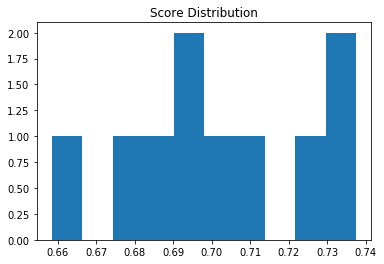

In [17]:
for i in range(len(scores)): 
  print(round(scores[i],2))

plt.hist(scores);
plt.title("Score Distribution")

print("average score: ", round(np.average(scores),3))
print("standard dev: ", round(np.std(scores),3))

# Train in the whole dataset for the final model

In [0]:
# select samples
x_train = dataset_x
y_train = dataset_y

y_list_train=[]
for i in range(len(y_train)):
  y_list_train.append(one_hot_encoding(y_train[i]))

y_train = np.asarray(y_list_train)

clf = SVC(class_weight='balanced', gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf.fit(x_train, np.argmax(y_train, axis=1))

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Test & Confusion in a Random Set 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.25, random_state=40)

predicted_labels = clf.predict(x_test)

confusion_matrix(y_test, predicted_labels)

array([[117,   2,  17],
       [115, 693,  83],
       [ 10,   3, 160]])

In [0]:
from sklearn.metrics import balanced_accuracy_score
BMAC = balanced_accuracy_score(y_test, predicted_labels)
print (BMAC)

0.8543091289181054


# Exctract the Data

In [0]:
column_names_x = ['id']
for i in range(1000):
  column_names_x.append('x'+str(i))

raw_dataset_x_test = pd.read_csv('/content/X_test.csv', names=column_names_x,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True, skiprows=True)

dataset_x_test = raw_dataset_x_test.copy()
dataset_x_test.tail()

dataset_x_test.pop("id")
dataset_x_test = np.asarray(dataset_x_test)

list_x_test=[]
for i in range(4100):
    list_x_test.append(dataset_x_test[i,:])

dataset_x_test = np.asarray(list_x_test)

predictions = clf.predict(dataset_x_test)

index = 0.0
with open('whole_dataset_SVC_final.txt', 'w') as f:
    f.write("%s\n" % "id,y")
    for predict in predictions:
        writing_str = str(index)+','+str(predict.item(0)*1.0)
        f.write("%s\n" % writing_str)
        index = index + 1